# Contour plots

### A discussion on customising contour plots by selecting contour levels, plotting regions and colour scales.  The routines we will use are:

### cfp.con - make a contour plot

### cfp.levs - select contour levels

### cfp.mapset - map setting

### cfp.gset - plot region for all non-map plots

### cfp.cscale - colour scales






# cfp.con - make a contour plot

### Some common contour and plot labeling options.


In [1]:
# Plot images inline - not needed in Python
%matplotlib inline

# Import packages
import cf
import cfplot as cfp

In [5]:
# Read in some data and look at the data limits
f=cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/data1.nc')[7]
print(f)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



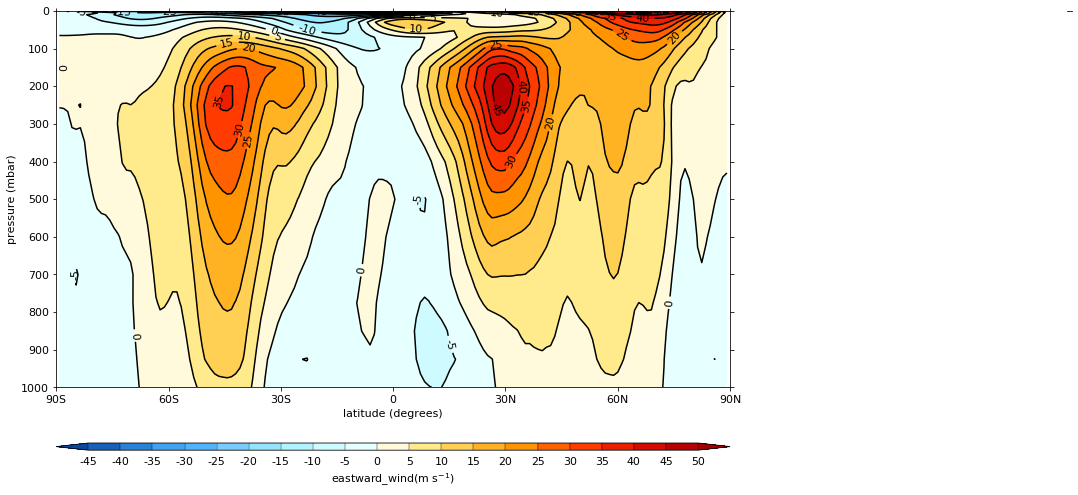

In [6]:
# Make a contour plot of the zonal mean of this data
cfp.con(f.collapse('mean','longitude'))

In [11]:
# A blockfill plot is used to show the actual limits of the data 
#cfp.con(f.collapse('mean','longitude'), blockfill=True, lines=False)

In [12]:
# We can thicken the zero contour line with the zero_thick parameter
#cfp.con(f.collapse('mean','longitude'), blockfill=True, zero_thick=3.0)

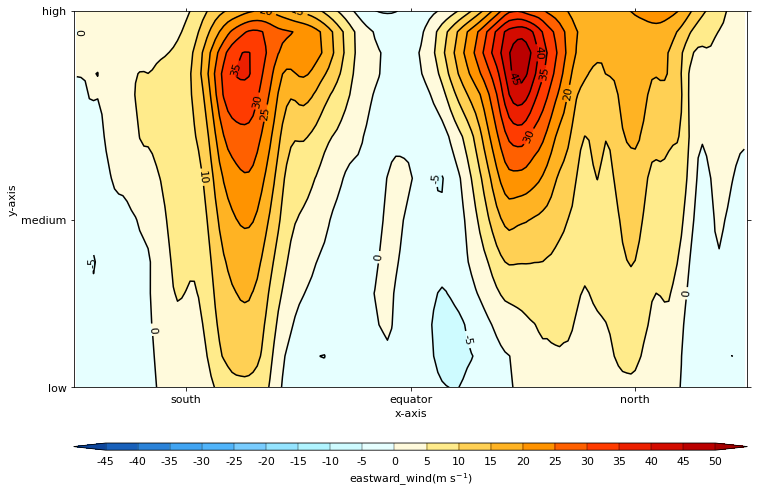

In [13]:
# Labeling plots with different tick marks and axis labels
xticks=[-60,0, 60]
xticklabels=['south', 'equator', 'north']
yticks=[1000, 600, 100]
yticklabels=['low', 'medium', 'high']

cfp.con(f.collapse('mean','longitude'),\
        xticks=xticks, xticklabels=xticklabels,
        yticks=yticks, yticklabels=yticklabels,
        xlabel='x-axis', ylabel='y-axis')

# cfp.levs - make custom contour levels

In [15]:
# cfp.levs takes a min, max, step to generate a set of levels
cfp.levs(min=-30, max=30, step=5)
#
# We can see the levels generated as they are store in a Python variable
print(cfp.plotvars.levels)

[-30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30]


In [17]:
# The min, max step are in positional order so we could have used
cfp.levs(-30, 30, 5)
print(cfp.plotvars.levels)

[-30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30]


In [18]:
# We can use a floating point values as well
cfp.levs(6, 12, 0.2)
print(cfp.plotvars.levels)

[ 6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6
  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4
 11.6 11.8 12. ]


In [19]:
# We can set our own values as needed with the manual keyword.
# Note: values need to be in ascending order.
cfp.levs(manual=[-30, -20, -10, -5, -1, 1, 5, 10, 20, 30])
print(cfp.plotvars.levels)

[-30, -20, -10, -5, -1, 1, 5, 10, 20, 30]


In [ ]:
# A further parameter called extend selects the behaviour of the colorbar extension 
# This is the triangle on the end of the colorbar to indicate that all values above
# or below the end labelled value are coloured in with this colour.

# extend takes the values ’neither’, ‘both’, ‘min’, or ‘max’ with 'both' being the default.



In [20]:
# cfp.levs parameters are persistent so you don't have to set them before each contour plot
# To reset the contour levels to the default call levs with no parameters
cfp.levs()
print(cfp.plotvars.levels)

None


# cfp.mapset - Setting the map



/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


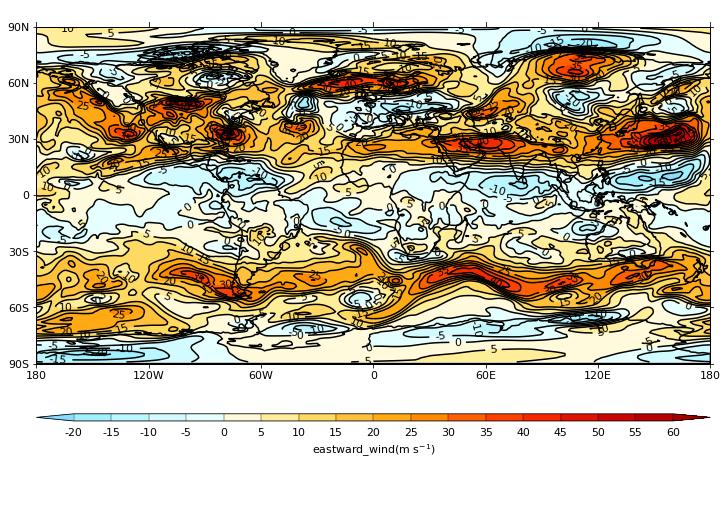

In [22]:
# cfp.mapset defaults to the cylindrical projection 
# The default is -180 to 180 in longitude and -90 to 90 in latitude
f=cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/data1.nc')[7]
cfp.con(f.subspace(pressure=500))

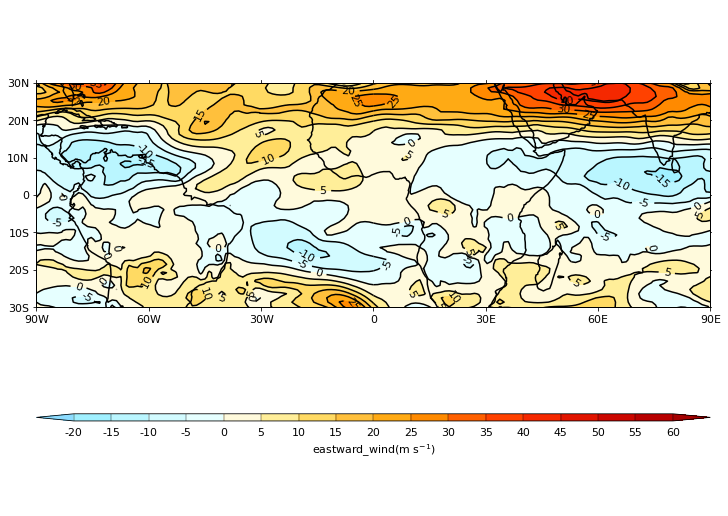

In [23]:
#cfp.mapset takes four positional values for the default cylindrical projection 
cfp.mapset(lonmin=-90, lonmax=90, latmin=-30, latmax=30)

# This can be simplified to
cfp.mapset(-90, 90, -30, 30)
cfp.con(f.subspace(pressure=500))


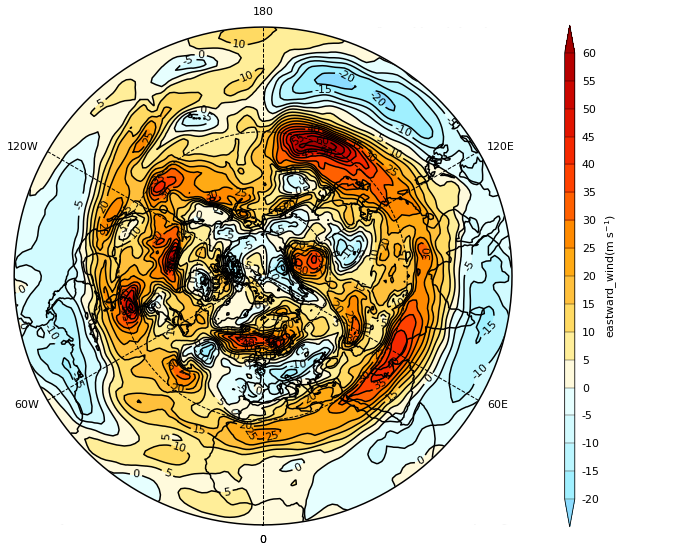

In [24]:
# To use the polar stereographic projection use proj='npstere' or proj='spstere' parameters
cfp.mapset(proj='npstere')
cfp.con(f.subspace(pressure=500))


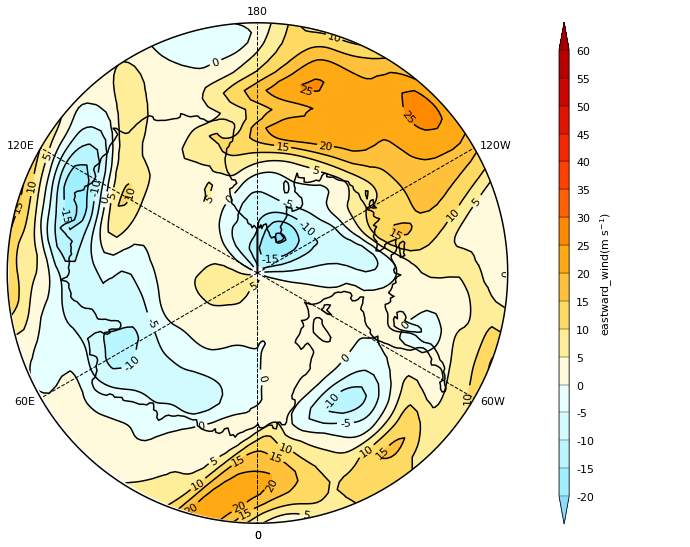

In [25]:
# Additional parameters the the polar stereographic plots are
# boundinglat - set the edge of the viewable latitudes
# lon_0 - centre of desired map domain

# So to look at Antarctica 
cfp.mapset(proj='spstere', boundinglat=-60, lon_0=180)
cfp.con(f.subspace(pressure=500))


In [26]:
# As with contour levels, mapping is persistent between plots.
# To reset to the default pass no parameters to cfp.mapset
cfp.mapset()

In [ ]:
# Other projections available include:
# Lambert Conformal, Mercator, Mollweide, Orthographic and Robinson projections. 
# See the Basemap documentation at http://matplotlib.org/basemap/users/mapsetup.html for calling parameters.





# cfp.gset - Setting the plotting region for non-map plots



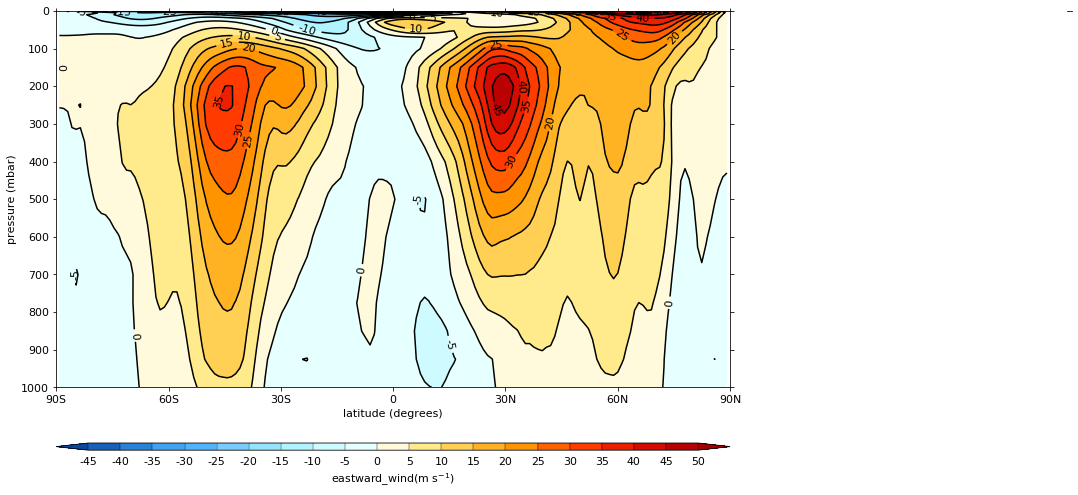

In [27]:
cfp.f=cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/data1.nc')[7]
cfp.con(f.collapse('mean','longitude'))

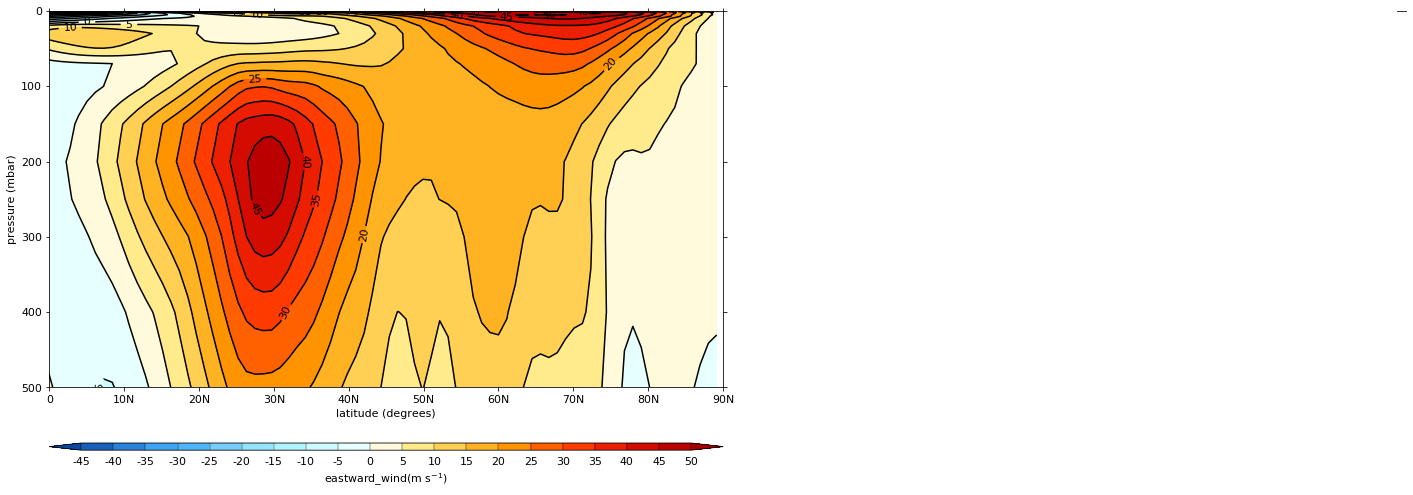

In [28]:
cfp.gset(xmin=0, xmax=90, ymin=500, ymax=0)
# or
cfp.gset(0, 90, 500, 0)
cfp.con(f.collapse('mean','longitude'))

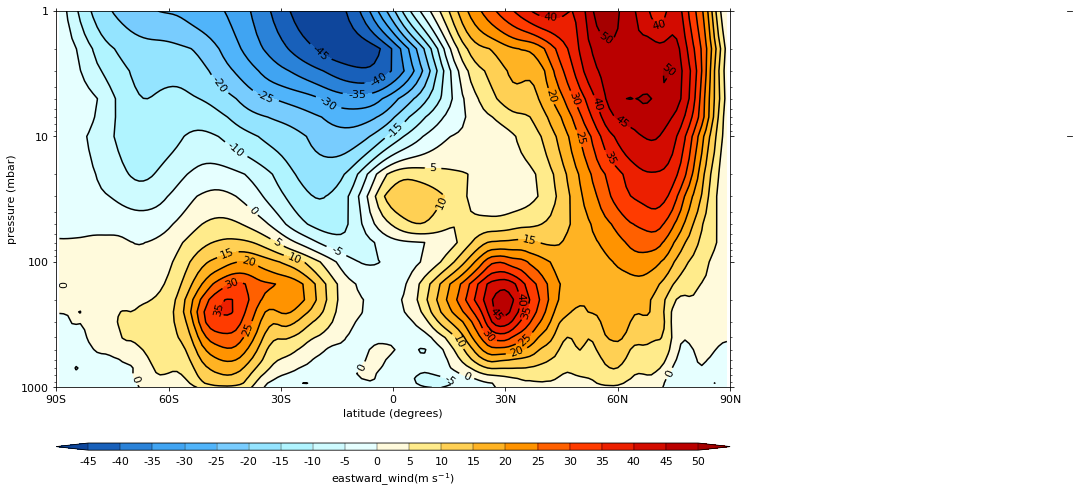

In [29]:
# gset also takes the xlog and ylog keywords
# Log axes cannot span or include zero in them
cfp.gset(-90, 90, 1000, 1, ylog=True)
cfp.con(f.collapse('mean','longitude'))

In [30]:
# To reset to the defaults call gset with no parameters
cfp.gset()





# cfp.cscale - Colour scales



A colour scale is automatically selected based on the data:

**'scale1'**  - blue-red - divergent colour scale
contour levels which include zero in the levels  
e.g. zonal wind

**'viridis'** - blue-green-yellow - perceptually uniform colour scale
contour levels without a zero value in the levels
e.g. temperature in Kelvin

See End of the rainbow http://www.climate-lab-book.ac.uk/2014/end-of-the-rainbow for a good discussion on colour scale selection.

Around 140 colour scales are available in cf-plot - http://ajheaps.github.io/cf-plot/colour_scales.html
It is also very easy to add your own colour scale

- **ncols** - number of colours
- **above** - number of colours above the midpoint of the original scale
- **below** - number of colours below the midpoint of the original scale
- **white** - change these colour indicies to be white
- **reverse** - reverse the colour scale
- **uniform** - make the colour scale uniform for different numbers
of below and above colours


Once you change the colour scale you have full control of the colours but care is required to match the contour levels and colours to your data. 





Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east



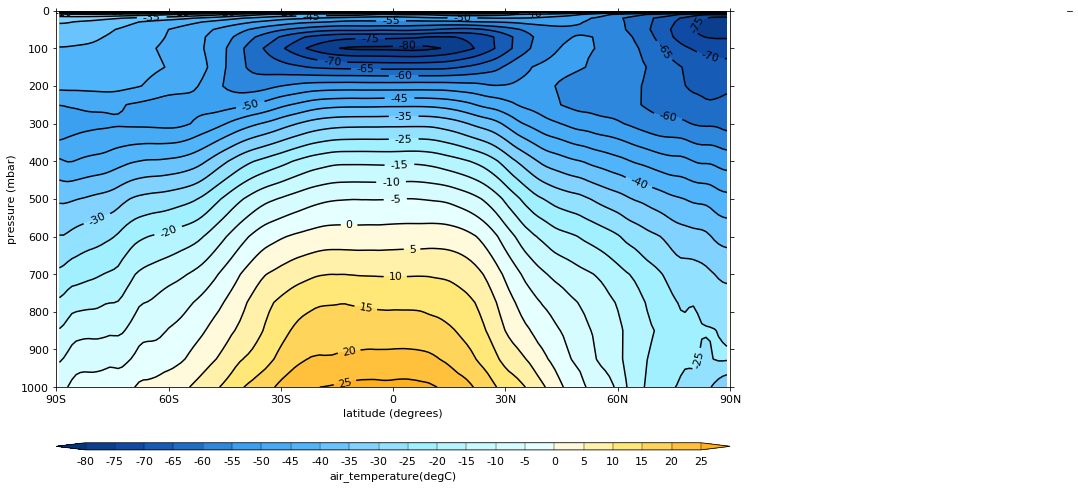

In [34]:
# contour plot of the zonal mean temperature in Celsius
f=cf.read('~/blueberry_11_19/cf_training/jupyter/ncas_data/data1.nc')[6]
print(f)
f.units = 'degC'
cfp.con(f.collapse('mean','longitude'))

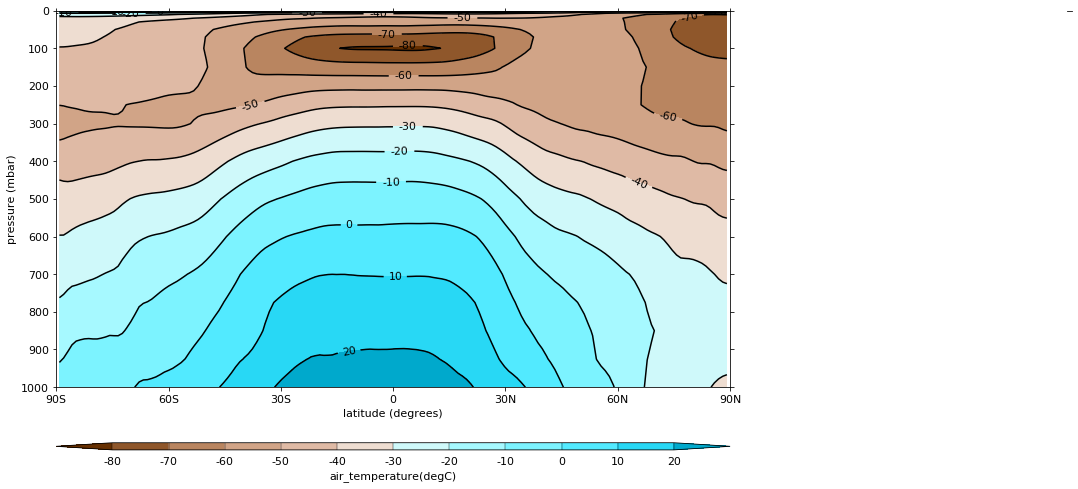

In [35]:
# Change levels and colour scale
# The red-blue division isn't around zero as we would expect it to be
cfp.levs(-80, 20, 10)
cfp.cscale('scale16', ncols=12)
cfp.con(f.collapse('mean','longitude'))

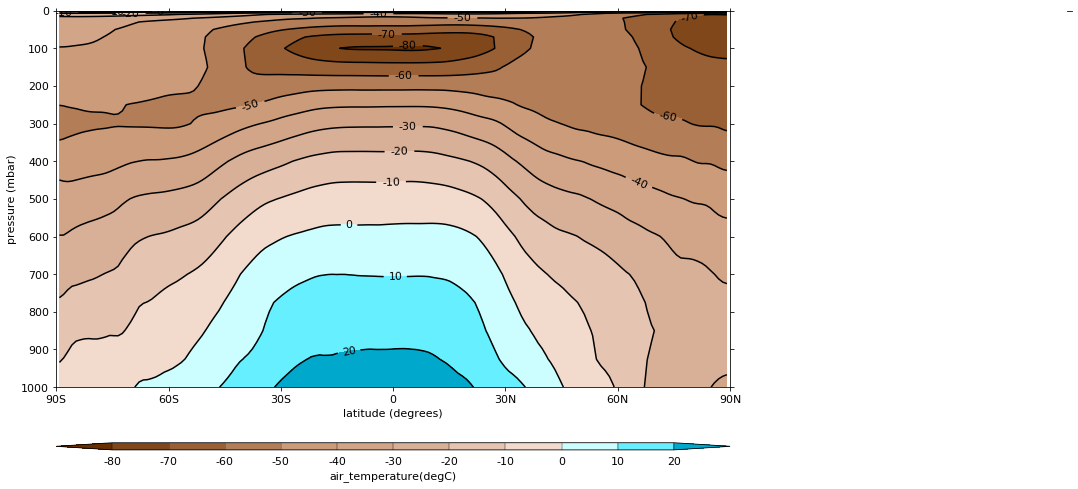

In [36]:
# Select the correct colours for above and below zero
cfp.cscale('scale16', below=9, above=3)
cfp.con(f.collapse('mean','longitude'))

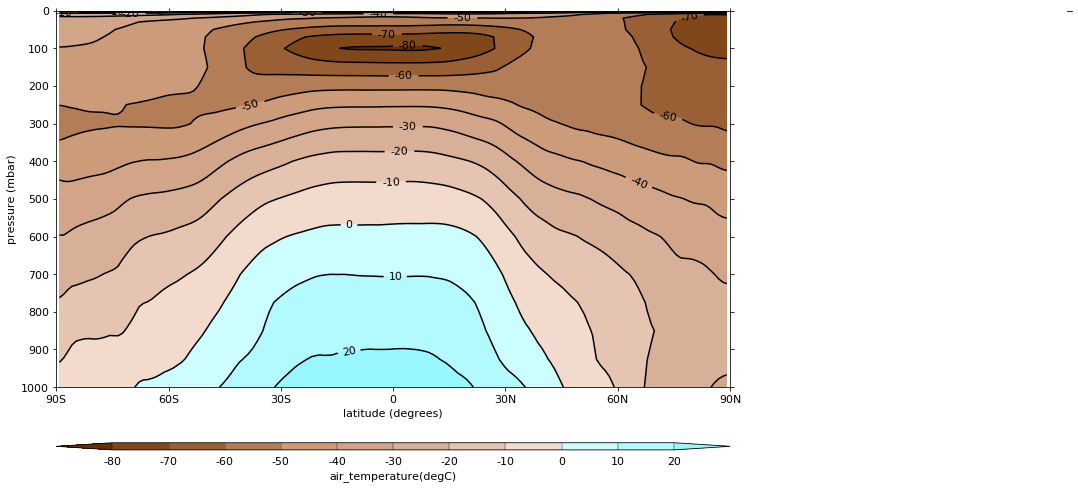

In [37]:
# Add the uniform keyword
cfp.cscale('scale16', below=9, above=3, uniform=True)
cfp.con(f.collapse('mean','longitude'))

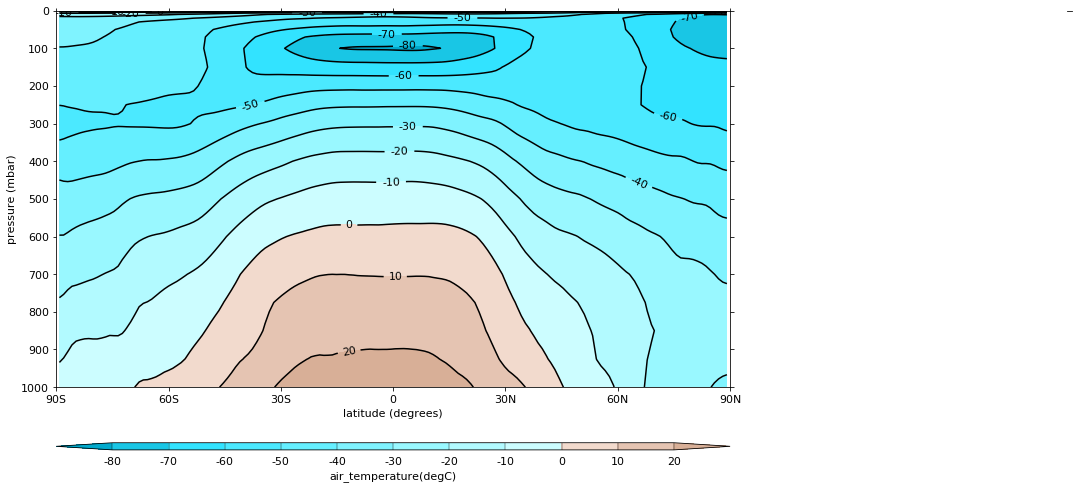

In [38]:
# Reverse the colour scale - intuitively this looks better
# Care is needed when selecting an appropriate colour scale
cfp.cscale('scale16', below=9, above=3, uniform=True, reverse=True)
cfp.con(f.collapse('mean','longitude'))

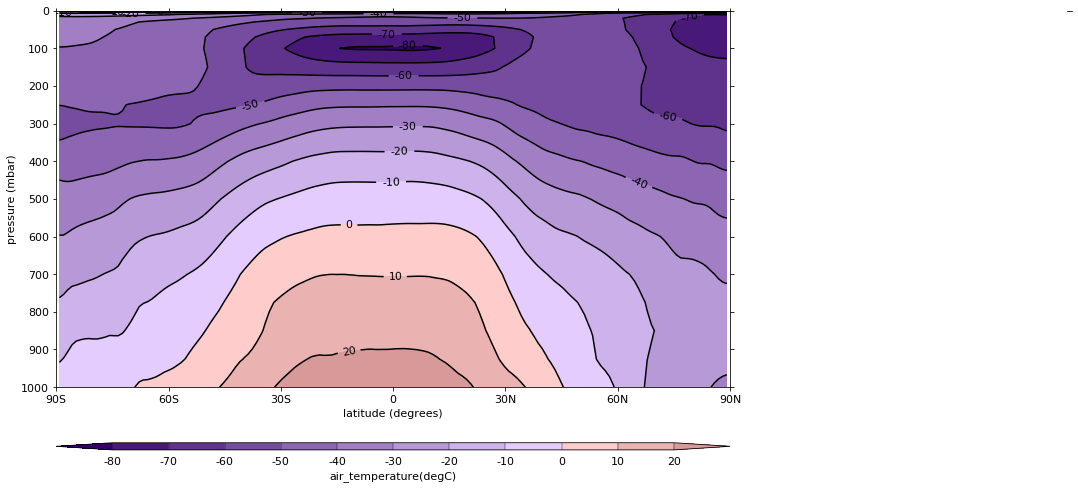

In [39]:
# Setting your own colour scale
# Colour scales are defined as red green and blue values for each colour.  The intensities 
# range from 0 to 255 and have one defined colour per line
# Red would be 255 0 0
# Blue would be 0 0 255

# We will make a green-red colour scale by saving values to a file and then loading them into the 
# cscale routine.
with open('myscale.rgb', 'w') as file:
    file.write('51 0 102\n')
    file.write('229 204 255\n')
    file.write('255 204 204\n')
    file.write('102 0 0\n')

               
# Load and use new colour scale
cfp.levs(-80, 20, 10)
cfp.cscale('myscale.rgb', below=9, above=3, uniform=True)
cfp.con(f.collapse('mean','longitude'))





# Plotting data from arrays
## cf-plot plotting routines will accept data from arrays for plotting
## Here we make a map plot using numpy arrays

In [ ]:
cfp.reset()


from netCDF4 import Dataset as ncfile
import numpy as np
nc = ncfile('../ncas_data/data4.nc')
lons = nc.variables['lon'][:]
lats = nc.variables['lat'][:]
temp = nc.variables['tas'][0,:,:]

print 'x shape', np.shape(lons)
print 'y shape', np.shape(lats)
print 'field shape', np.shape(temp)

In [ ]:
# Make a contour plot
cfp.con(f=temp, x=lons, y=lats)

In [ ]:
# We have passed data arrays to cf-plot and the package has no way of knowing that the data is a map plot
# We can indicate this with the ptype parameter
# ptype=1 - longitude - latitude plot
# ptype=2 - latitude - height plot
# ptype=3 - longitude – height plot
# ptype=4 - longitude - time plot
# ptype=5 - latitude - time plot
# ptype=6 - rotated pole plot
# ptype=7 - time - height plot

cfp.con(f=temp, x=lons, y=lats, ptype=1)